<a href="https://colab.research.google.com/github/jhonatanalfred7/ScriptPythonML/blob/main/RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

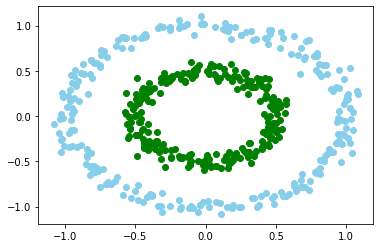

In [ ]:
#Crear dataset
n = 500
p = 2
#make_circles?
X, Y = make_circles(n, factor = 0.5, noise = 0.05)

Y = Y[:, np.newaxis]
#plt.scatter(X[:,0],X[:,1])
#plt.scatter(X[Y==0,0], X[Y==0,1], c= "skyblue")
plt.scatter(X[Y[:,0] == 0,0], X[Y[:,0] ==0,1], c= "skyblue")
#plt.scatter(X[Y==1,0], X[Y==1,1], c = "salmon")
plt.scatter(X[Y[:,0] == 1,0], X[Y[:,0] == 1,1], c = "green")
plt.show()

In [ ]:
#clase de la capa de la red
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    
    self.act_f = act_f
    self.b = np.random.rand(1,n_neur) * 2 - 1
    self.W = np.random.rand(n_conn,n_neur) * 2 - 1

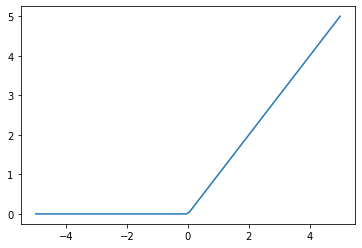

In [ ]:
#Funciones de activacion
sigm = (lambda x: 1/(1 + np.e ** (-x)),
       lambda x: x * (1 - x))

relu = lambda x: np.maximum(0,x)

_X = np.linspace(-5,5,100)
#plt.plot(_X,sigm[0](_X))
plt.plot(_X,relu(_X))

In [ ]:
l0 = neural_layer(p,4,sigm)
l1 = neural_layer(4,8,sigm)
#...

def create_nn(topology, act_f):
  nn = []

  for l,layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l],topology[l+1], act_f))
  
  return nn

In [ ]:
#topology = [p,4,8,16,8,4,1]
topology = [p,4,8,1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda yp, yr: np.mean((yp - yr) ** 2),
           lambda yp, yr: (yp - yr))

def train(neural_net,X,Y, l2cost, lr = 0.5, train = True):
  out = [(None, X)]

  #forward pass
  for l,layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z,a))
    
  #print(l2_cost[0](out[-1][1],Y))

  if train:

    #backward pass
    deltas = []

    for l in reversed(range(0,len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        #calcular delta ultima capa.
        deltas.insert(0,l2_cost[1](a,Y) * neural_net[l].act_f[1](a))
      else:
        #calcular delta respecto a capa previa.
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))


      _W = neural_net[l].W


      #gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0,keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0]  * lr

  return out[-1][1]


tst = train(neural_net,X,Y,l2_cost, 0.5)

In [ ]:
tst[0][0]

0.6548880121305416

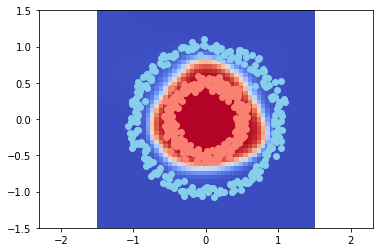

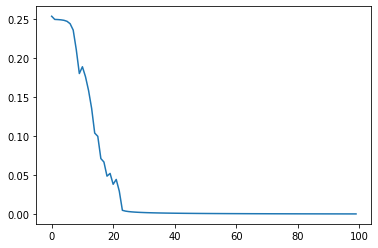

In [ ]:
import time
from IPython.display import clear_output
neural_n = create_nn(topology, sigm)
loss = []

for i in range(2500):
  
  #entrenamos a la red!
  pY = train(neural_n,X,Y,l2_cost, lr = 0.05)
  
  if i % 25 == 0:
    
    loss.append(l2_cost[0](pY,Y))
    
    res = 50
    _x0 = np.linspace(-1.5,1.5,res)
    _x1 = np.linspace(-1.5,1.5, res)
    _Y = np.zeros((res,res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0,i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]
        
    
    plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0,0], X[Y[:,0] == 0, 1], c = "skyblue")
    plt.scatter(X[Y[:,0] == 1,0], X[Y[:,0] == 1, 1], c = "salmon")

    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()
    time.sleep(0.5)